### Exploratory Data Analysis

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 24 18:26:09 2023

@author: deniz
"""

import h5py    
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

f1 = h5py.File("SNC manual curate - Analysis_results-5.8.23  4 Bur bilateral AG recording007.hdf5",'r+')
f2 = h5py.File("VTA manual curate - Analysis_results-5.8.23  4 Bur bilateral AG recording006.hdf5",'r+')

In [3]:

cleared_estimates1 = pd.DataFrame(f1['estimates/F_dff'])
cleared_estimates2 = pd.DataFrame(f2['estimates/F_dff'])

accepted_index1 = list(f1["estimates/accepted_list"])
accepted_index2 = list(f2["estimates/accepted_list"])

cleared_df1 = cleared_estimates1.iloc[accepted_index1, :]
cleared_df2 = cleared_estimates2.iloc[accepted_index2, :]

In [4]:
cleared_df1.info()
cleared_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 6 to 55
Columns: 3000 entries, 0 to 2999
dtypes: float64(3000)
memory usage: 844.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 64
Columns: 3000 entries, 0 to 2999
dtypes: float64(3000)
memory usage: 914.4 KB


In [5]:
print(cleared_df1.to_numpy().shape)
print(cleared_df2.to_numpy().shape)

(36, 3000)
(39, 3000)


In [6]:
np_df1 = cleared_df1.to_numpy()
np_df2 = cleared_df2.to_numpy()
np_df1[1, :].shape

(3000,)

In [7]:
frame_list = [
    [0, 1500],
    [0, 3000]
]

In [8]:
def plot_by_frame(data, time_range, title):
    cell_num, _ = data.shape
    for i in range(cell_num):
        plt.plot(time_range, data[i, time_range])

    plt.xlabel('Frame')
    plt.ylabel(r'Ca2+ Activity ($\Delta$F/F$_0$)')
    plt.title(title)      
    plt.show()

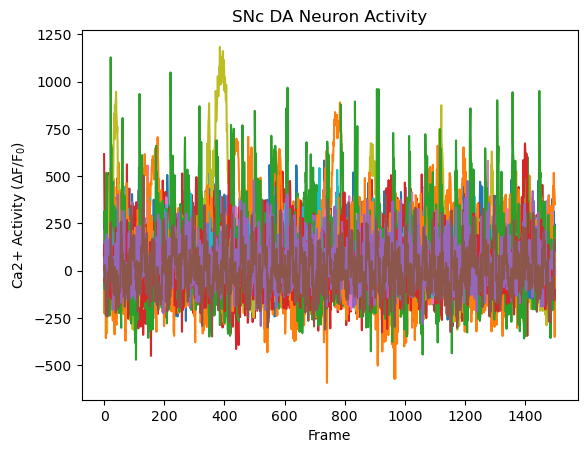

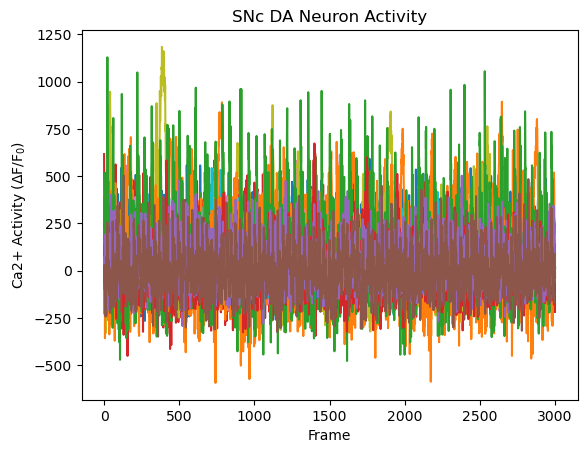

In [9]:

for time_range in frame_list:
    plot_by_frame(np_df1, np.arange(time_range[0], time_range[1]), 'SNc DA Neuron Activity')

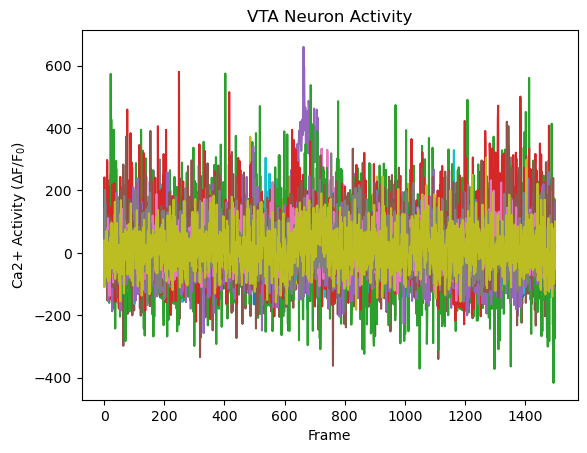

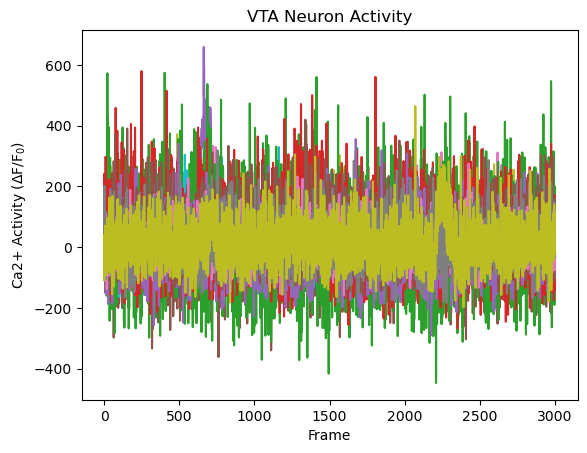

In [10]:
for time_range in frame_list:
    plot_by_frame(np_df2, np.arange(time_range[0], time_range[1]), 'VTA Neuron Activity')

In [11]:
from scipy.stats import pearsonr
def get_corr_figure(data, time_range, title):
    num_cells = data.shape[0]
    corr_matrix = np.zeros((num_cells, num_cells))
    p_value_matrix = np.zeros((num_cells, num_cells))

    # Calculate correlation and p-values
    for i in range(num_cells):
        for j in range(num_cells):
            corr_coef, p_value = pearsonr(data[i, time_range], data[j, time_range])
            corr_matrix[i, j] = corr_coef
            p_value_matrix[i, j] = p_value

    corr_matrix[p_value_matrix >= 0.05] = 0.0
    corr_matrix[p_value_matrix == 0] = 0.0

    fig, ax = plt.subplots()
    plt.imshow(corr_matrix)
    plt.xlabel('Neuron #')
    plt.ylabel("Neuron #")
    cbar = plt.colorbar()
    plt.title(title)
    cbar.ax.set_ylabel("Pearson's R")
    plt.show()

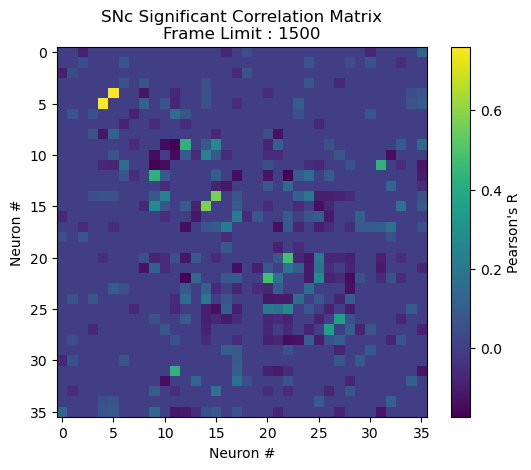

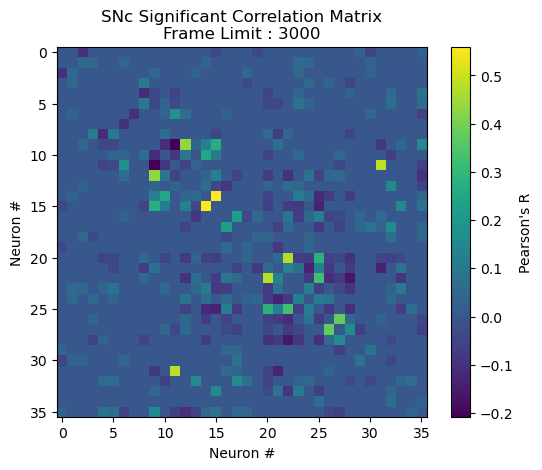

In [12]:
for time_range in frame_list:
    get_corr_figure(np_df1, np.arange(time_range[0], time_range[1]), "SNc Significant Correlation Matrix\nFrame Limit : " + str(time_range[1]))


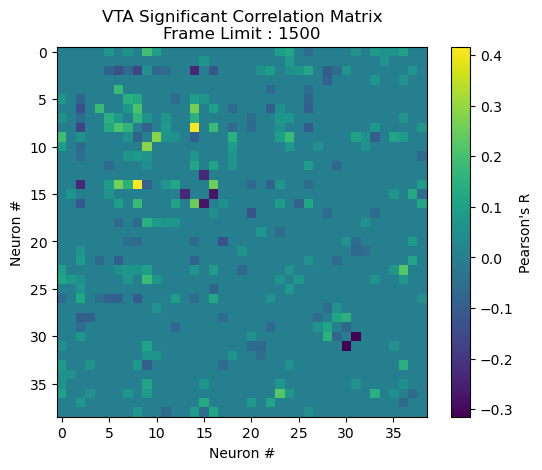

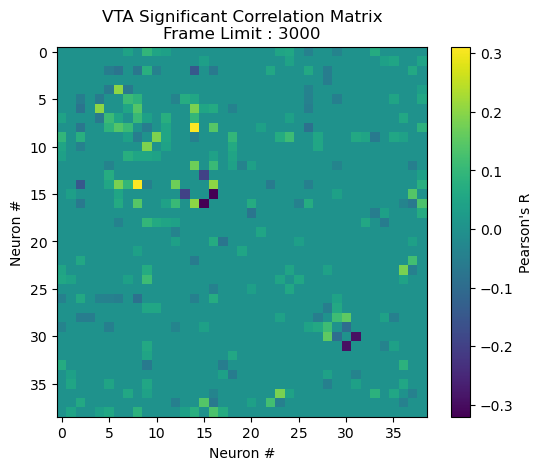

In [13]:
for time_range in frame_list:
    get_corr_figure(np_df2, np.arange(time_range[0], time_range[1]), "VTA Significant Correlation Matrix\nFrame Limit : " + str(time_range[1]))

<AxesSubplot:>

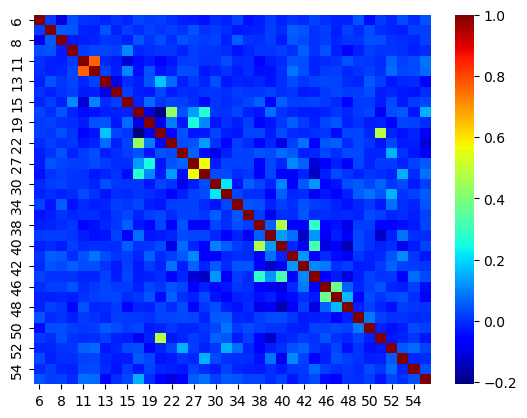

In [14]:
correlation_matrix1 = cleared_df1.T.corr()
sns.heatmap(correlation_matrix1, cmap="jet")

<AxesSubplot:>

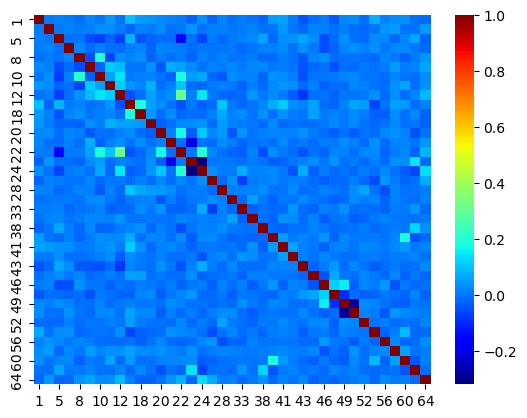

In [15]:
correlation_matrix2 = cleared_df2.T.corr()
sns.heatmap(correlation_matrix2, cmap="jet")

## PCA

In [16]:
from sklearn.preprocessing import StandardScaler

scaled_df1 = StandardScaler().fit_transform(cleared_df1)
scaled_df2 = StandardScaler().fit_transform(cleared_df2)

In [17]:
scaled_df1.mean(), scaled_df1.std()

(7.894919286223335e-18, 0.9999999999999999)

In [18]:
scaled_df2.mean(), scaled_df2.std()

(4.8584118684451295e-18, 1.0)

In [20]:
from sklearn.decomposition import PCA

pca_obj = PCA()
pca_obj = PCA()

pca1 = pca_obj.fit_transform(scaled_df1)
pca2 = pca_obj.fit_transform(scaled_df2)

In [21]:
pca_df1 = pd.DataFrame(data=pca1
             , columns = ["principal component" + str(i) for i in range(1, len(pca1)+1)])
pca_df2 = pd.DataFrame(data=pca2
             , columns = ["principal component" + str(i) for i in range(1, len(pca2)+1)])


<AxesSubplot:>

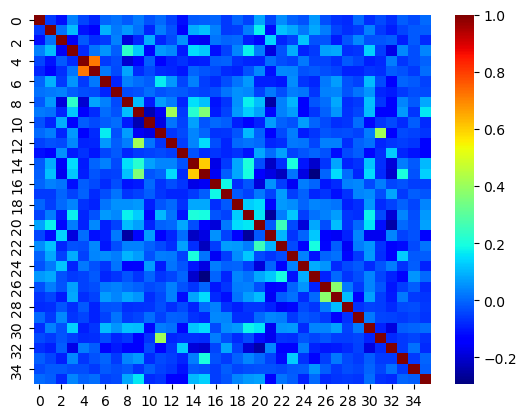

In [22]:
sns.heatmap(pca_df1.T.corr(), cmap="jet")

<AxesSubplot:>

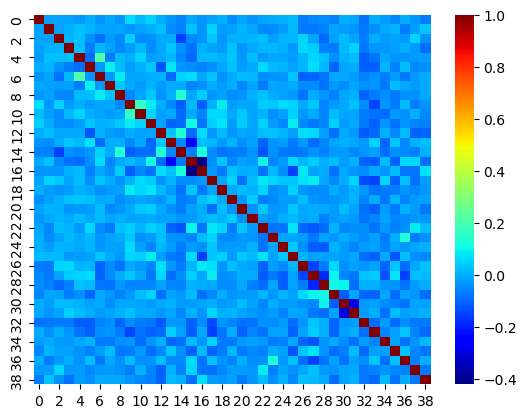

In [23]:
sns.heatmap(pca_df2.T.corr(), cmap="jet")